In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'congress-output/Data/'
SVC_file = 'congress_FOREST_output-model.csv'

col = ['param_max_depth','param_max_features', 'param_n_estimators','param_criterion','mean_test_accuracy', 'mean_test_f1','mean_test_precision', 'mean_test_recall']
col_metric = ['mean_test_accuracy', 'mean_test_f1','mean_test_precision', 'mean_test_recall']
prep = 1

In [3]:
pd_results = pd.read_csv(path + SVC_file)

In [4]:
results = pd_results[col]

In [142]:
results

,param_max_depth,param_max_features,param_n_estimators,param_criterion,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,1,sqrt,10,gini,0.921670,0.906879,0.904557,0.912281
1,1,sqrt,20,gini,0.944715,0.936207,0.917736,0.956140
2,1,sqrt,30,gini,0.930973,0.920065,0.898145,0.945029
3,1,sqrt,40,gini,0.944715,0.937603,0.900852,0.977778
4,1,sqrt,50,gini,0.930867,0.918694,0.905201,0.933918
...,...,...,...,...,...,...,...,...
1195,11,log2,260,entropy,0.944926,0.936235,0.926784,0.946199
1196,11,log2,270,entropy,0.944926,0.936235,0.926784,0.946199
1197,11,log2,280,entropy,0.944926,0.936235,0.926784,0.946199
1198,11,log2,290,entropy,0.944926,0.936762,0.918262,0.956725


In [22]:
def plot_function(results, params, fixed, metrics):
    for id_x,x in enumerate(params):
        len_par = params.copy()
        len_par = np.delete(len_par, id_x)
        sub_res = results.copy()
        
        tit = ''
        for x_par in len_par:
            sub_res = sub_res.loc[(sub_res[x_par] == fixed[x_par])]
            tit += '{} = {}, '.format(x_par[6:],fixed[x_par])
       
        plt.figure()
        x_vals = sub_res[x].to_list()
    
        for single_met in metrics:
            y_vals = sub_res[single_met].to_list()
            plt.plot(x_vals,y_vals, label=single_met)
        plt.ylabel('Metric value')
        plt.xlabel('{}'.format(x[6:]))
        plt.grid()
        plt.legend()
    
            
        plt.title(tit)
        #plt.savefig('congress-output/plots/Forest/' + tit + x + '.png')


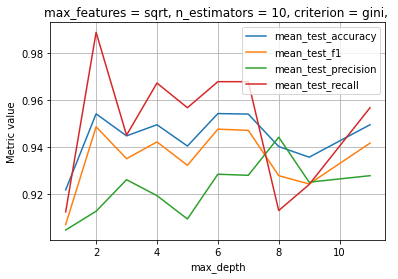

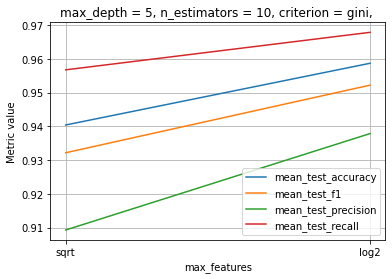

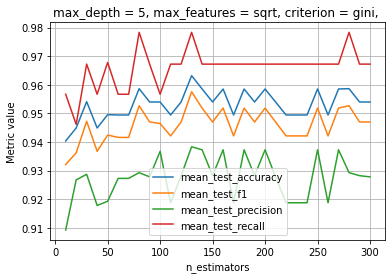

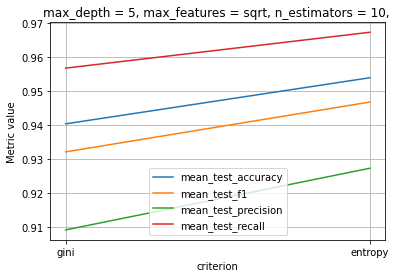

In [24]:
fixed = {'param_n_estimators': 10, 'param_max_depth': 5, 'param_max_features': 'sqrt', 'param_criterion': 'gini'}
plot_function(results, np.array(col[0:4]), fixed, col_metric)